In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, fcluster

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending Category
0,1,Male,19,15,39,L
1,2,Male,21,15,81,H
2,3,Female,20,16,6,L
3,4,Female,23,16,77,H
4,5,Female,31,17,40,M


In [7]:
print("Column Names:", df.columns)

Column Names: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Spending Category'],
      dtype='object')


In [4]:
def categorize_spending_score(score):
    if score > 85:
        return 'VH'
    elif 65 <= score <= 84:
        return 'H'
    elif 40 <= score <= 64:
        return 'M'
    else:
        return 'L'

In [9]:
df['Spending Category'] = df['Spending Score (1-100)'].apply(categorize_spending_score)

print(df[['Spending Score (1-100)', 'Spending Category']].head(10))

df[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Spending Category']].to_csv("Mall_Customers_Categorized.csv", index=False)

print("File saved as Mall_Customers_Categorized.csv")

   Spending Score (1-100) Spending Category
0                      39                 L
1                      81                 H
2                       6                 L
3                      77                 H
4                      40                 M
5                      76                 H
6                       6                 L
7                      94                VH
8                       3                 L
9                      72                 H
File saved as Mall_Customers_Categorized.csv


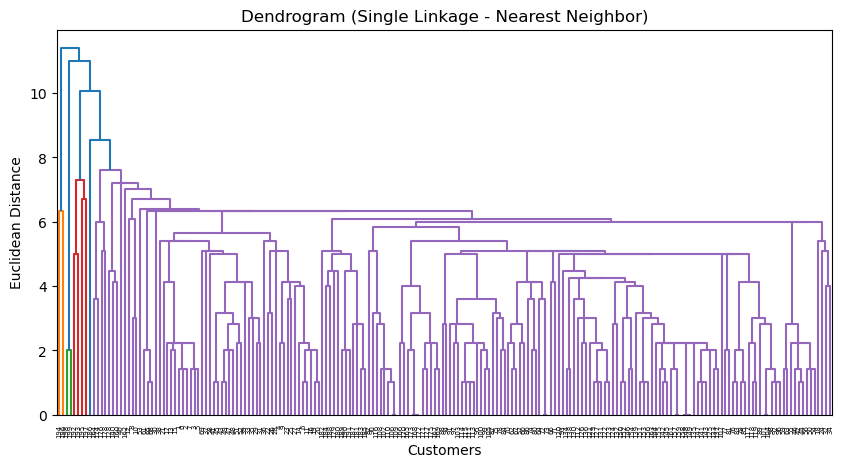

   Age  Annual Income (k$)  Cluster_3  Cluster_5
0   19                  15          3          4
1   21                  15          3          4
2   20                  16          3          4
3   23                  16          3          4
4   31                  17          3          4
5   22                  17          3          4
6   35                  18          3          4
7   23                  18          3          4
8   64                  19          3          4
9   30                  19          3          4
File saved as Mall_Customers_Clusters.csv


In [11]:
X = df[['Age', 'Annual Income (k$)']].values

linkage_matrix = linkage(X, method='single')

plt.figure(figsize=(10, 5))
sch.dendrogram(linkage_matrix)
plt.title("Dendrogram (Single Linkage - Nearest Neighbor)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

df['Cluster_3'] = fcluster(linkage_matrix, 3, criterion='maxclust')
df['Cluster_5'] = fcluster(linkage_matrix, 5, criterion='maxclust')

print(df[['Age', 'Annual Income (k$)', 'Cluster_3', 'Cluster_5']].head(10))

df.to_csv("Mall_Customers_Clusters.csv", index=False)
print("File saved as Mall_Customers_Clusters.csv")



In [13]:
def calculate_purity(df, cluster_col, label_col):
    clusters = df[cluster_col].unique()  
    total_samples = len(df)  
    correct_assignments = 0  

    for cluster in clusters:
        cluster_data = df[df[cluster_col] == cluster]  
        most_common_label = cluster_data[label_col].value_counts().idxmax() 
        correct_assignments += (cluster_data[label_col] == most_common_label).sum()  

    return correct_assignments / total_samples  


purity_3 = calculate_purity(df, 'Cluster_3', 'Spending Category')
purity_5 = calculate_purity(df, 'Cluster_5', 'Spending Category')


print(f"Purity for 3 clusters: {purity_3:.4f}")
print(f"Purity for 5 clusters: {purity_5:.4f}")


Purity for 3 clusters: 0.4250
Purity for 5 clusters: 0.4400
